# Task1


In [9]:
from sklearn.datasets import load_wine
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.decomposition import PCA
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

In [25]:
wine = load_wine()
X = wine.data
y = wine.target
wine

{'data': array([[1.423e+01, 1.710e+00, 2.430e+00, ..., 1.040e+00, 3.920e+00,
         1.065e+03],
        [1.320e+01, 1.780e+00, 2.140e+00, ..., 1.050e+00, 3.400e+00,
         1.050e+03],
        [1.316e+01, 2.360e+00, 2.670e+00, ..., 1.030e+00, 3.170e+00,
         1.185e+03],
        ...,
        [1.327e+01, 4.280e+00, 2.260e+00, ..., 5.900e-01, 1.560e+00,
         8.350e+02],
        [1.317e+01, 2.590e+00, 2.370e+00, ..., 6.000e-01, 1.620e+00,
         8.400e+02],
        [1.413e+01, 4.100e+00, 2.740e+00, ..., 6.100e-01, 1.600e+00,
         5.600e+02]]),
 'target': array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1

#Part1: KNN Only

In [24]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
knn = KNeighborsClassifier(n_neighbors=3, n_jobs=1)
knn.fit(X_train, y_train)
y_pred_knn = knn.predict(X_test)
acc_knn = accuracy_score(y_test, y_pred_knn)
print(f"Simple KNN Accuracy: {acc_knn:.4f}")

Simple KNN Accuracy: 0.7407


#Part2: PCA then KNN

In [26]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)
X_train_pca, X_test_pca, y_train_pca, y_test_pca = train_test_split(X_pca, y, test_size=0.3, random_state=42)
knn_pca = KNeighborsClassifier(n_neighbors=3, n_jobs=1)
knn_pca.fit(X_train_pca, y_train_pca)
y_pred_knn_pca = knn_pca.predict(X_test_pca)
acc_knn_pca = accuracy_score(y_test_pca, y_pred_knn_pca)
print(f"KNN Accuracy on PCA: {acc_knn_pca:.4f}")

KNN Accuracy on PCA: 0.7407


#Part3: Rule-Based systems

In [27]:
alcohol_idx = list(wine.feature_names).index('alcohol')
def rule_based(alcohol_val):
    if alcohol_val < 12:
        return 0
    elif alcohol_val < 13:
        return 1
    else:
        return 2
y_pred_rule = np.array([rule_based(X_test[i, alcohol_idx]) for i in range(len(X_test))])
acc_rule = accuracy_score(y_test, y_pred_rule)
print(f"Rule-Based Accuracy: {acc_rule:.4f}")
print(f"Comparison: Simple KNN ({acc_knn:.4f}) vs Rule-Based ({acc_rule:.4f})")

Rule-Based Accuracy: 0.4815
Comparison: Simple KNN (0.7407) vs Rule-Based (0.4815)


#Part4: Distance Metrics & Decision Boundary

In [29]:
print("\nFormulas for Distance Metrics:")
print("1. Euclidean: √(∑(x_i - y_i)^2)")
print("2. Manhattan: ∑|x_i - y_i|")
print("3. Chebyshev: max|x_i - y_i|")
print("4. Cosine: 1 - (∑(x_i * y_i)) / (√(∑x_i^2) * √(∑y_i^2))")
print("5. Mahalanobis: √((x - y)^T * Σ^{-1} * (x - y))  (where Σ is the covariance matrix)")
print("-" * 50)


Formulas for Distance Metrics:
1. Euclidean: √(∑(x_i - y_i)^2)
2. Manhattan: ∑|x_i - y_i|
3. Chebyshev: max|x_i - y_i|
4. Cosine: 1 - (∑(x_i * y_i)) / (√(∑x_i^2) * √(∑y_i^2))
5. Mahalanobis: √((x - y)^T * Σ^{-1} * (x - y))  (where Σ is the covariance matrix)
--------------------------------------------------


In [30]:
metrics = ['euclidean', 'manhattan', 'chebyshev', 'cosine', 'mahalanobis']
acc_metrics = {}
for metric in metrics:
    if metric == 'mahalanobis':
        cov = np.cov(X_train.T)
        knn_m = KNeighborsClassifier(n_neighbors=3, metric=metric, metric_params={'V': cov}, n_jobs=1)
    else:
        knn_m = KNeighborsClassifier(n_neighbors=3, metric=metric, n_jobs=1)
    knn_m.fit(X_train, y_train)
    y_pred_m = knn_m.predict(X_test)
    acc_metrics[metric] = accuracy_score(y_test, y_pred_m)
    print(f"KNN Accuracy with {metric}: {acc_metrics[metric]:.4f}")

KNN Accuracy with euclidean: 0.7407
KNN Accuracy with manhattan: 0.7963
KNN Accuracy with chebyshev: 0.7407
KNN Accuracy with cosine: 0.7778
KNN Accuracy with mahalanobis: 0.9074


Plot saved as boundaries.png


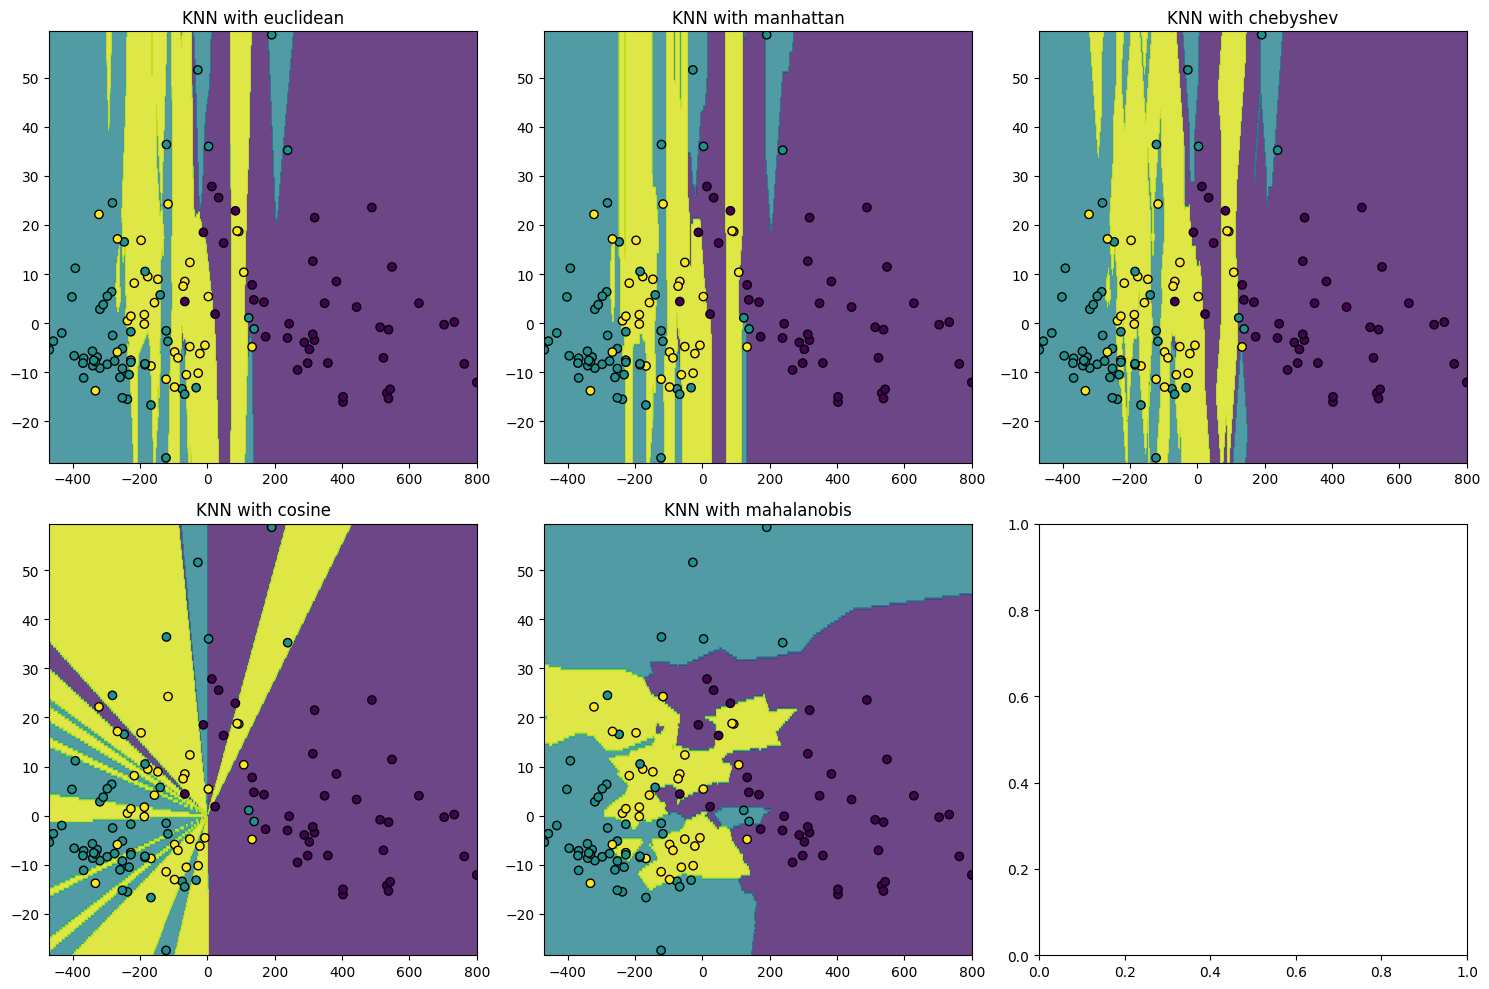

In [46]:
fig, axs = plt.subplots(2, 3, figsize=(15, 10))
axs = axs.ravel()
idx = 0
x_min, x_max = X_train_pca[:, 0].min() - 1, X_train_pca[:, 0].max() + 1
y_min, y_max = X_train_pca[:, 1].min() - 1, X_train_pca[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.5), np.arange(y_min, y_max, 0.5))
for metric in metrics:
    if metric == 'mahalanobis':
        cov_pca = np.cov(X_train_pca.T)
        knn_plot = KNeighborsClassifier(n_neighbors=3, metric=metric, metric_params={'V': cov_pca}, n_jobs=1)
    else:
        knn_plot = KNeighborsClassifier(n_neighbors=3, metric=metric, n_jobs=1)
    knn_plot.fit(X_train_pca, y_train_pca)


    grid_points = np.c_[xx.ravel(), yy.ravel()]
    Z = knn_plot.predict(grid_points)
    Z = Z.reshape(xx.shape)
    axs[idx].contourf(xx, yy, Z, alpha=0.8)
    axs[idx].scatter(X_train_pca[:, 0], X_train_pca[:, 1], c=y_train_pca, edgecolors='k')
    axs[idx].set_title(f'KNN with {metric}')
    idx += 1
plt.tight_layout()
plt.savefig('boundaries.png')
print("Plot saved as boundaries.png")


#Part5:Soft Encoding-->Classification-as-Regression

In [43]:
y_soft_train = np.where(y_train == 0, 0.0, np.where(y_train == 1, 0.5, 1.0))
y_soft_test = np.where(y_test == 0, 0.0, np.where(y_test == 1, 0.5, 1.0))

# y_soft_train = np.full_like(y_train, 1.0, dtype=float)
# y_soft_train = np.where(y_train == 1, 0.5, y_soft_train)
# y_soft_train = np.where(y_train == 0, 0.0, y_soft_train)

# y_soft_test = np.full_like(y_test, 1.0, dtype=float)
# y_soft_test = np.where(y_test == 1, 0.5, y_soft_test)
# y_soft_test = np.where(y_test == 0, 0.0, y_soft_test)


lr = LinearRegression()
lr.fit(X_train, y_soft_train)
y_pred_soft = lr.predict(X_test)


In [18]:
def map_to_class(pred):
    if pred < 0.25:
        return 0
    elif pred < 0.75:
        return 1
    else:
        return 2
y_pred_class = np.array([map_to_class(p) for p in y_pred_soft])
acc_reg = accuracy_score(y_test, y_pred_class)
print(f"Regression Accuracy with Soft Encoding: {acc_reg:.4f}")

Regression Accuracy with Soft Encoding: 0.9444


In [19]:
lr_pca = LinearRegression()
lr_pca.fit(X_train_pca, y_soft_train)
y_pred_soft_pca = lr_pca.predict(X_test_pca)
y_pred_class_pca = np.array([map_to_class(p) for p in y_pred_soft_pca])
acc_reg_pca = accuracy_score(y_test_pca, y_pred_class_pca)
print(f"Regression Accuracy on PCA: {acc_reg_pca:.4f}")

Regression Accuracy on PCA: 0.5926


Regression plot saved as reg_boundary.png


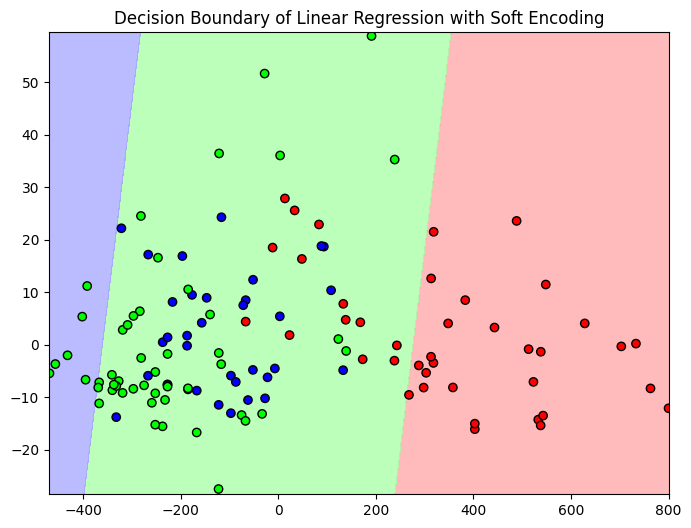

In [44]:
fig_reg, ax = plt.subplots(figsize=(8, 6))
Z_reg = lr_pca.predict(np.c_[xx.ravel(), yy.ravel()])
Z_reg_class = np.array([map_to_class(p) for p in Z_reg])
Z_reg_class = Z_reg_class.reshape(xx.shape)
ax.contourf(xx, yy, Z_reg_class, alpha=0.8, cmap=cmap_light)
ax.scatter(X_train_pca[:, 0], X_train_pca[:, 1], c=y_train_pca, cmap=cmap_bold, edgecolors='k')
ax.set_title('Decision Boundary of Linear Regression with Soft Encoding')
plt.savefig('reg_boundary.png')
print("Regression plot saved as reg_boundary.png")